# Bagging/Random Forest Scenario: Healthcare – Predicting Patient Readmission 

A hospital wants to predict whether patients are likely to be readmitted within 30 days of discharge. They have historical data about patients, including: 

Age 

BMI (Body Mass Index) 

Blood_Pressure (average systolic reading) 

Days_Hospitalized 

Satisfaction_Score (post-discharge survey rating) 

Readmitted (Yes/No) 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('healthcare_readmission_500.csv')


X = df.drop(columns=['Readmitted', 'Patient_ID'])
y = df['Readmitted']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.34, random_state=30)

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    random_state=30
)
rf_model.fit(Xtrain,ytrain)
ypred = rf_model.predict(Xtest)
accuracy = accuracy_score(ytest,ypred)


print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9471


              precision    recall  f1-score   support

          No       0.94      0.99      0.96       117
         Yes       0.98      0.85      0.91        53

    accuracy                           0.95       170
   macro avg       0.96      0.92      0.94       170
weighted avg       0.95      0.95      0.95       170



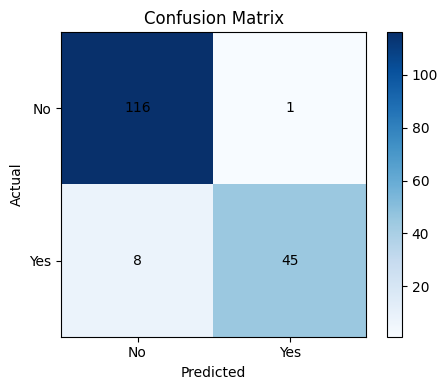

C:\Users\Mohit.gahlot\AppData\Local\Temp\ipykernel_19652\4216207409.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(features[idx], rotation=45, ha='right')


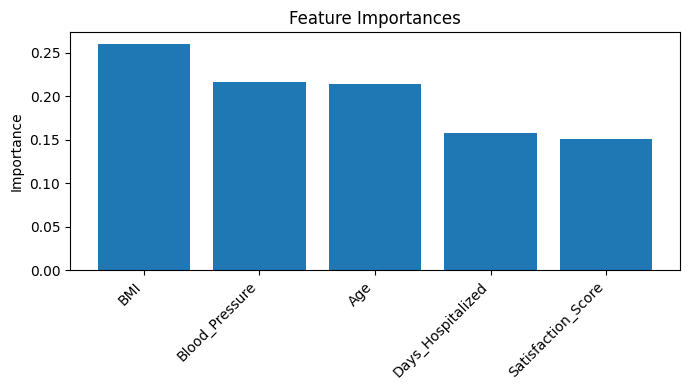

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# assumes: rf_model, Xtest, ytest, ypred are defined (from your existing cell)

# 1) Print classification report
print(classification_report(ytest, ypred))

# 2) Confusion matrix
cm = confusion_matrix(ytest, ypred)
labels = np.unique(ytest)
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(labels); ax.set_yticklabels(labels)
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
for (i,j), val in np.ndenumerate(cm):
    ax.text(j, i, int(val), ha='center', va='center', color='black')
fig.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 3) Feature importances
if hasattr(rf_model, "feature_importances_"):
    fi = rf_model.feature_importances_
    features = X.columns
    idx = np.argsort(fi)[::-1]
    fig, ax = plt.subplots(figsize=(7,4))
    ax.bar(features[idx], fi[idx], color='C0')
    ax.set_title('Feature Importances')
    ax.set_ylabel('Importance')
    ax.set_xticklabels(features[idx], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()